# Curvas de Aprendizado

In [4]:
from aurelio.plotter import collect, collect_zip
import os
import pandas as pd
import seaborn as sns

In [19]:
exps = [
    "no_elmo",
    "elmo",
    "kfold_reduced_elmo",
    "single_fold_no_elmo",
    "single_fold_no_elmo_reduced",
    "single_fold_elmo",
    "single_fold_elmo_reduced",
    "metrics_kfold_dev_reduced_elmo.zip",
    "metrics_kfold_dev_reduced_no_elmo.zip",
]

dfs = {}
for exp in exps:
    if ".zip" not in exp:
        path = "{}/metrics/{}".format(os.getcwd(), exp)
        dfs[exp] = pd.DataFrame.from_records(collect(path, exp))
    else:
        dfs[exp] = pd.DataFrame.from_records(collect_zip(exp, exp))
dfs["metrics_kfold_dev_reduced_elmo.zip"].head()

,best_epoch,best_validation_em,best_validation_end_acc,best_validation_f1,best_validation_loss,best_validation_span_acc,best_validation_start_acc,epoch,fold,name,...,training_loss,training_span_acc,training_start_acc,training_start_epoch,validation_em,validation_end_acc,validation_f1,validation_loss,validation_span_acc,validation_start_acc
0,17,0.122222,0.211111,0.265922,11.665848,0.122222,0.166667,19,10,metrics_kfold_dev_reduced_elmo.zip,...,0.092741,0.977778,0.980247,0,0.100000,0.188889,0.250121,13.296680,0.100000,0.155556
1,8,0.087912,0.230769,0.272971,9.465984,0.087912,0.142857,17,1,metrics_kfold_dev_reduced_elmo.zip,...,0.058965,0.988875,0.995056,0,0.076923,0.219780,0.279771,13.672179,0.076923,0.153846
2,14,0.088889,0.133333,0.212740,13.093230,0.077778,0.155556,19,2,metrics_kfold_dev_reduced_elmo.zip,...,0.045688,0.990123,0.995062,0,0.066667,0.166667,0.205182,14.639854,0.066667,0.133333
3,11,0.120879,0.274725,0.320759,10.927069,0.120879,0.164835,19,3,metrics_kfold_dev_reduced_elmo.zip,...,0.024341,0.995056,0.997528,0,0.087912,0.197802,0.280096,13.282261,0.087912,0.164835
4,12,0.164835,0.197802,0.295960,10.761628,0.164835,0.230769,19,4,metrics_kfold_dev_reduced_elmo.zip,...,0.046836,0.992583,0.996292,0,0.153846,0.263736,0.316106,13.446762,0.142857,0.197802


In [6]:
def plot_perc(dfs, names, metric):
    dfs = pd.concat([dfs[name] for name in names])
    sns.set(rc={'figure.figsize':(15,10)})
    sns.lineplot(x="perc", y=metric, data=dfs, hue="name")

## ELMO vs no ELMO: k-fold / respostas múltiplas

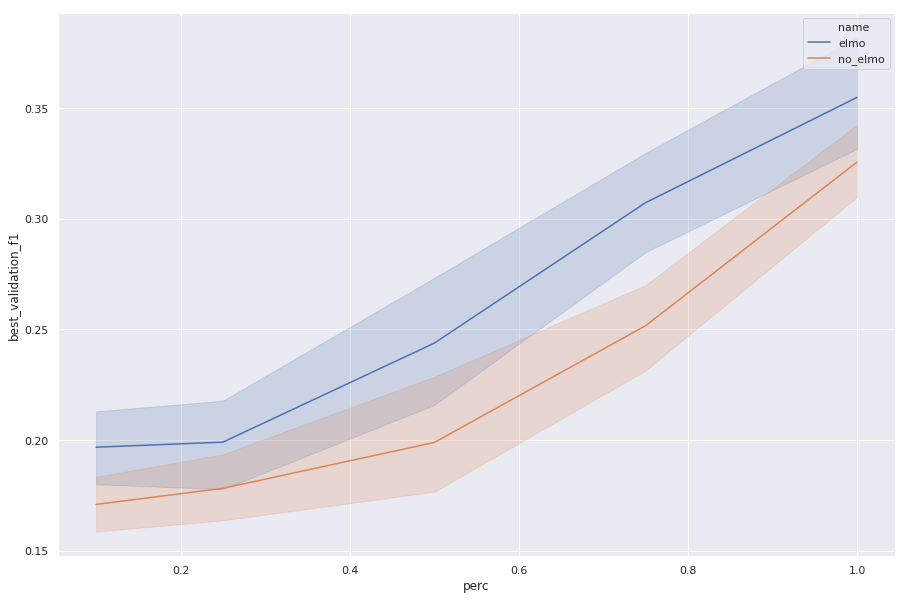

In [7]:
plot_perc(dfs, ["elmo", "no_elmo"], "best_validation_f1")

## ELMO vs no ELMO: holdout / respostas múltiplas

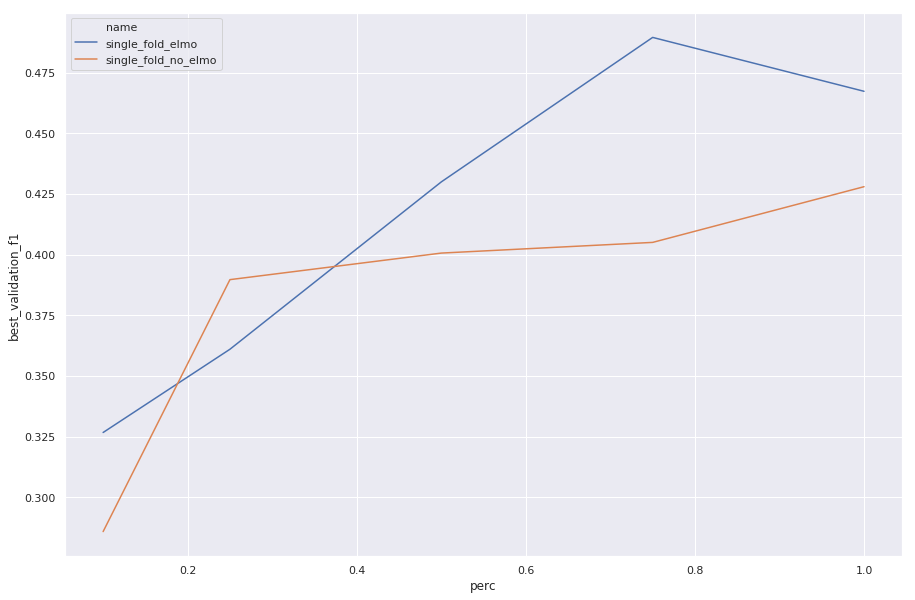

In [8]:
plot_perc(dfs, ["single_fold_elmo", "single_fold_no_elmo"], "best_validation_f1")

## Respostas múltiplas vs simples: ELMO / holdout

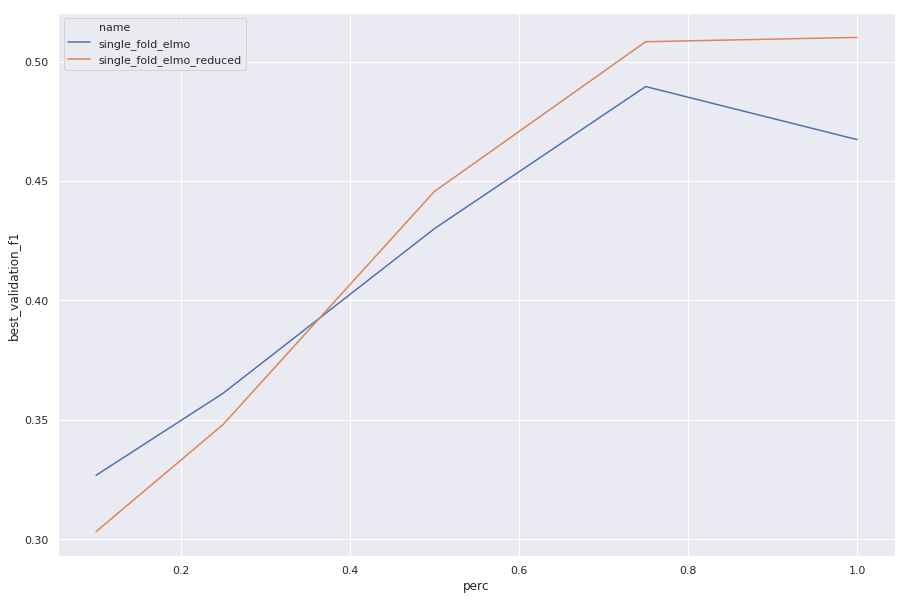

In [9]:
plot_perc(dfs, ["single_fold_elmo", "single_fold_elmo_reduced"], "best_validation_f1")

## Resposta única (DEV) vs Resposta Múltipla (DEV) : ELMO / kfold

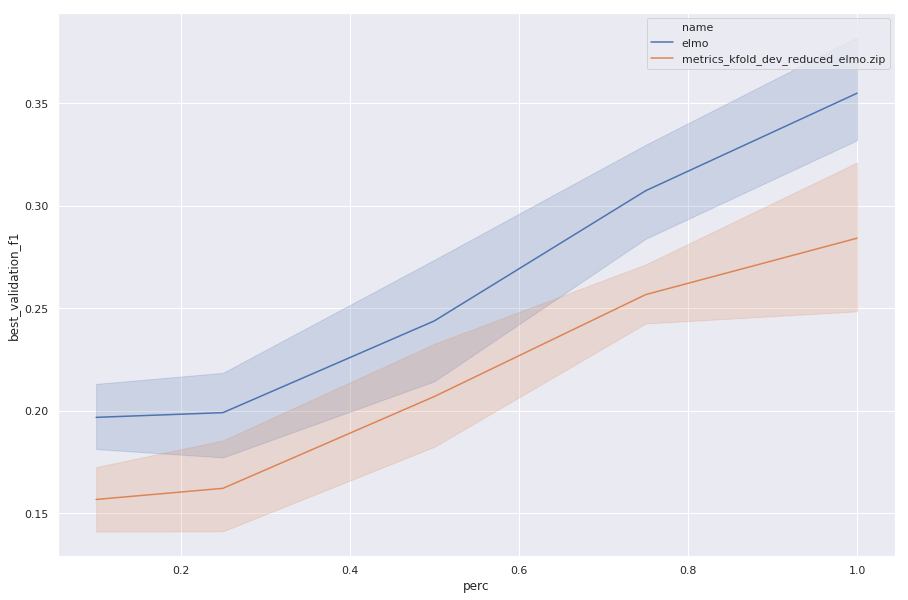

In [23]:
plot_perc(dfs, ["elmo", "metrics_kfold_dev_reduced_elmo.zip"], "best_validation_f1")

## Resposta única (DEV) vs Resposta Múltipla (DEV) : sem ELMO / kfold

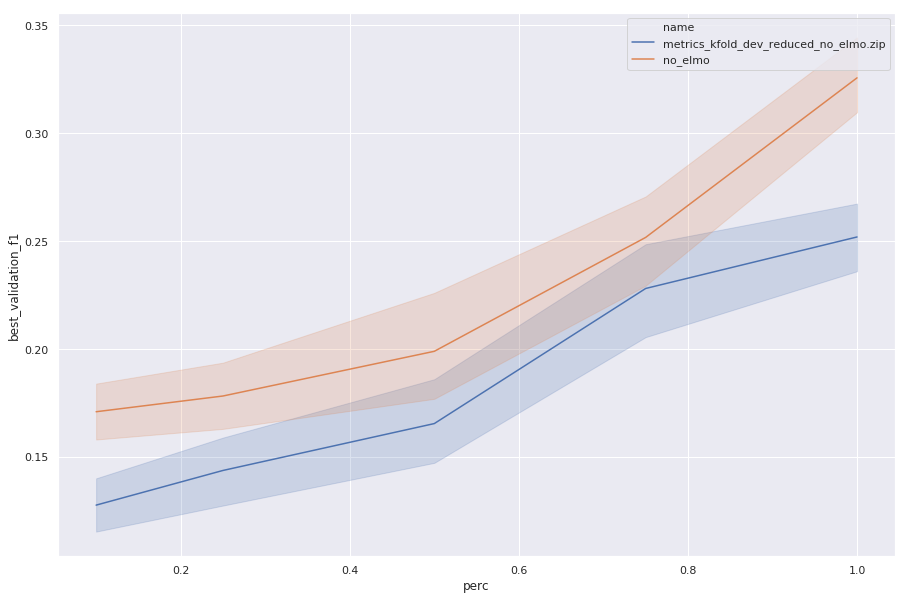

In [15]:
plot_perc(dfs, ["metrics_kfold_dev_reduced_no_elmo.zip", "no_elmo"], "best_validation_f1")

## Respostas múltiplas vs simples (100% train only): ELMO / k-fold

In [20]:
percs = dfs["elmo"].perc.unique()
df = dfs["kfold_reduced_elmo"]
df_new = df.copy()
df_new.perc = 0.9

df = pd.concat([df, df_new])

# dfs_new = []
# for perc in percs:
#     df_new = df.copy()
#     df_new.perc = perc
#     dfs_new.append(df_new)
# df = pd.concat(dfs_new)

# display(df)

# df = df[["name", "perc", "best_validation_f1"]].groupby(["name", "perc"]).agg(["mean", "std"])
# display(df)

# df = dfs["elmo"][["name", "perc", "best_validation_f1"]].groupby(["name", "perc"]).agg(["mean", "std"])
# display(df)

dfs["kfold_reduced_elmo"] = df

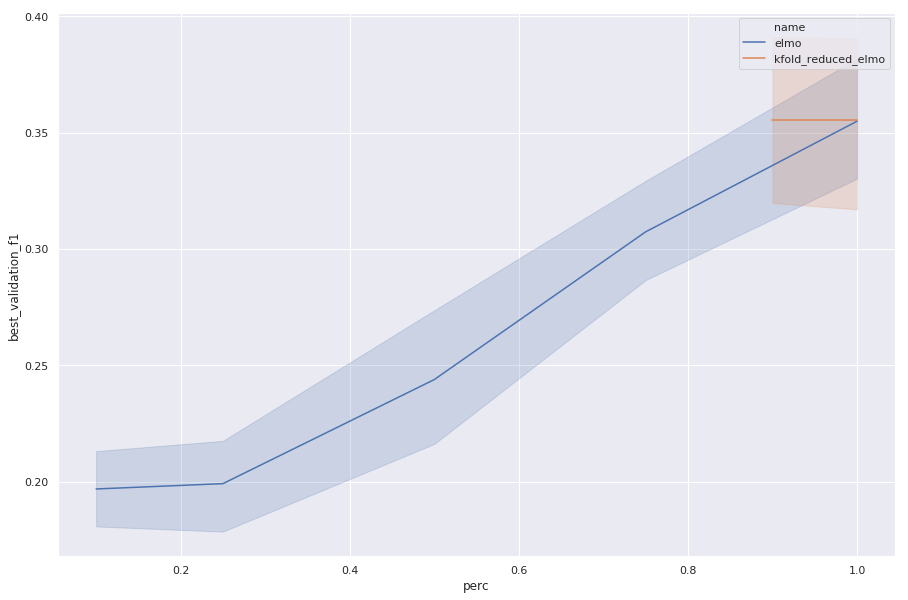

In [21]:
plot_perc(dfs, ["elmo", "kfold_reduced_elmo"], "best_validation_f1")